**Imports and Settings**

In [1]:
import functions as f
import numpy as np

sims = 10000000
player_count = 6

**Player Class**

In [2]:
class Player:

    def __init__(self, hand=None):
        # Allow for preset hands
        self.hand = hand if hand is not None else []
        self.show_rank = 0
        self.strength = []


    def draw(self, deck):
        # Draw 2 cards
        self.hand.append(deck.pop())
        self.hand.append(deck.pop())

        # Return updated deck
        return deck
    

    def evaluate(self, table):
        # Make dicts arranged by ranks and suits
        cards = table + self.hand
        ranks = {}
        suits = {}
        for rank, suit in cards:
            if rank not in ranks:
                ranks[rank] = []
            ranks[rank].append(suit)
            if suit not in suits:
                suits[suit] = []
            suits[suit].append(rank)
        
        self.show_rank, self.strength = f.evaluate_hand(cards, ranks, suits)

**All Hand Evaluation**

In [3]:
# Reset stat matrices
us_app = np.zeros((13, 13), dtype=int)
us_win = np.zeros((13, 13), dtype=int)
s_app = np.zeros((13, 13), dtype=int)
s_win = np.zeros((13, 13), dtype=int)
wintype = np.zeros(10)

for sim in range(sims):
    # Reset Deck, Players, Table, and Showdown
    deck = f.reset_deck()
    players = [Player() for _ in range(player_count)]
    table = []
    showdown = {}

    # Each Player Draws 2 Cards
    for player in players:
        deck = player.draw(deck)

    # Draw 5 Table Cards
    for _ in range(5):
        table.append(deck.pop())

    # Showdown Cards
    winners = f.determine_winner(table, players)
    f.print_winner(players, winners, sim, sims)

    # Update Stats
    us_app, us_win, s_app, s_win, wintype = f.update_stats(players, winners, us_app, us_win, s_app, s_win, wintype)
    

Player 0 Wins with a Full House, 8s over 9s (0.0%)
Player 1 Wins with a Two Pair, Aces over Queens with 10 Kicker (0.01%)
Player 1 Wins with a Straight, 7 High (0.02%)
Player 0 Wins with a Pair of Kings, with Jack-9-8 Kicker (0.03%)
Player 1 Wins with Trip 3s, Ace-10 Kicker (0.04%)
Player 2 Wins with a Straight, Ace High (0.05%)
Player 4 Wins with a Two Pair, 9s over 3s with Queen Kicker (0.06%)
Player 3 Wins with a Straight, Jack High (0.07%)
Player 4 Wins with Trip Kings, Jack-7 Kicker (0.08%)
Player 0 Wins with a Straight, 10 High (0.09%)
Player 0 Wins with a Two Pair, Aces over 9s with King Kicker (0.1%)
Player 2 Wins with a Pair of Jacks, with 9-6-5 Kicker (0.11%)
Player 3 Wins with Trip 9s, Ace-King Kicker (0.12%)
Player 4 Wins with a Two Pair, Queens over 8s with King Kicker (0.13%)
Player 2 Wins with a Two Pair, 8s over 4s with Ace Kicker (0.14%)
Player 2 Wins with a Two Pair, Kings over 10s with 9 Kicker (0.15%)
Player 2 Wins with Trip 6s, King-Jack Kicker (0.16%)
Player 1 Win

**Output Results**

A-A o: 49.47%
K-K o: 43.19%
Q-Q o: 38.43%
J-J o: 34.13%
A-K s: 32.22%
A-Q s: 30.7%
10-10 o: 30.43%
K-Q s: 29.51%
A-J s: 29.33%
A-K o: 28.95%
K-J s: 28.38%
A-10 s: 28.29%
Q-J s: 27.6%
K-10 s: 27.28%
A-Q o: 27.21%
9-9 o: 27.07%
Q-10 s: 26.81%
J-10 s: 26.5%
K-Q o: 26.26%
A-9 s: 25.88%
A-J o: 25.74%
K-J o: 25.0%
A-8 s: 24.82%
K-9 s: 24.74%
8-8 o: 24.64%
A-10 o: 24.61%
Q-J o: 24.34%
A-7 s: 24.3%
A-5 s: 24.09%
Q-9 s: 24.08%
K-10 o: 23.8%
J-9 s: 23.8%
10-9 s: 23.69%
A-4 s: 23.44%
Q-10 o: 23.31%
A-6 s: 23.31%
A-3 s: 23.13%
K-8 s: 23.05%
J-10 o: 23.04%
A-2 s: 22.34%
7-7 o: 22.29%
K-7 s: 22.2%
Q-8 s: 22.15%
10-8 s: 22.11%
J-8 s: 22.07%
A-9 o: 21.94%
9-8 s: 21.87%
K-6 s: 21.73%
K-5 s: 21.45%
A-8 o: 21.03%
K-9 o: 20.92%
K-4 s: 20.79%
Q-7 s: 20.66%
6-6 o: 20.61%
10-9 o: 20.47%
Q-9 o: 20.46%
J-7 s: 20.46%
8-7 s: 20.43%
10-7 s: 20.32%
A-7 o: 20.28%
9-7 s: 20.24%
J-9 o: 20.23%
Q-6 s: 20.21%
K-3 s: 20.18%
A-5 o: 19.98%
Q-5 s: 19.82%
K-2 s: 19.73%
A-4 o: 19.39%
7-6 s: 19.24%
A-6 o: 19.22%
Q-4 s: 19.18%


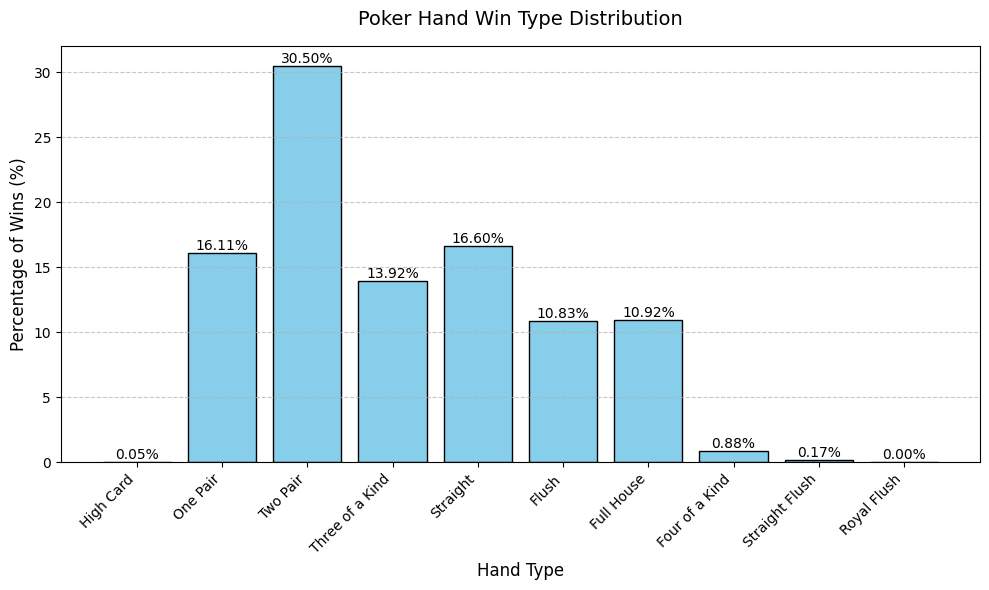

In [6]:
f.rank_hands(us_app, us_win, s_app, s_win)
f.plot_wintype(wintype, sims)